In [1]:
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
Lambda = splot.apStarWavegrid()
import csv

## RA and Dec

In [2]:
RA=[]
RA_green=[]
Dec_green=[]
RA_purple=[]
Dec_purple=[]
RA_red=[]
Dec_red=[]
RA_blue=[]
Dec_blue=[]
with open('Average Visits.csv') as csvfile:
        
    reader = csv.DictReader(csvfile,delimiter='\t')
    
    for row in reader:
        if float(row['Average Equivalent Width'])>0 and float(row['Average Equivalent Width'])<2.5:
            RA_green.append(float(row['RA']))
            Dec_green.append(float(row['Dec']))
        if float(row['Average Equivalent Width'])>2.5 and float(row['Average Equivalent Width'])<5:
            RA_purple.append(float(row['RA']))
            Dec_purple.append(float(row['Dec']))
        if float(row['Average Equivalent Width'])>5 and float(row['Average Equivalent Width'])<10:
            RA_red.append(float(row['RA']))
            Dec_red.append(float(row['Dec']))
        if float(row['Average Equivalent Width'])>10:
            RA_blue.append(float(row['RA']))
            Dec_blue.append(float(row['Dec']))

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord

#green
ra_green = RA_green * u.degree
dec_green = Dec_green * u.degree
c = SkyCoord(ra=ra_green, dec=dec_green, frame='icrs')
ra_green = c.ra.wrap_at(180 * u.deg).radian
dec_green = c.dec.radian

#purple
ra_purple = RA_purple * u.degree
dec_purple = Dec_purple * u.degree
c = SkyCoord(ra=ra_purple, dec=dec_purple, frame='icrs')
ra_purple = c.ra.wrap_at(180 * u.deg).radian
dec_purple = c.dec.radian

#red
ra_red = RA_red * u.degree
dec_red = Dec_red * u.degree
c = SkyCoord(ra=ra_red, dec=dec_red, frame='icrs')
ra_red = c.ra.wrap_at(180 * u.deg).radian
dec_red = c.dec.radian

#blue
ra_blue = RA_blue * u.degree
dec_blue = Dec_blue * u.degree
c = SkyCoord(ra=ra_blue, dec=dec_blue, frame='icrs')
ra_blue = c.ra.wrap_at(180 * u.deg).radian
dec_blue = c.dec.radian

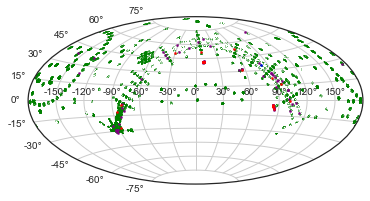

In [7]:
img = plt.imread('Galactic Plane.jpg')



ax = plt.subplot(111,projection='aitoff',aspect='equal',zorder=2)
#ax.imshow(img,extent=[-5,5,-1.5,0.5],aspect='auto',zorder=0)
#ax.imshow(img,extent=[-5,5,-0.9,1.1],aspect='auto',zorder=0)
#ax.imshow(img,extent=[-3.5,3.25,-2.5,2.75],aspect='auto')

ax.scatter(ra_green,dec_green,zorder=1, s=0.1,color='green')
ax.scatter(ra_purple, dec_purple,zorder=2,s=5,color='purple')
ax.scatter(ra_red, dec_red,zorder=3,s=5,color='red')
ax.scatter(ra_blue, dec_blue,zorder=1,s=5,color='blue')
#ax.set_axis_off()

ax.grid(True)
green_patch = patches.Patch(color='green', label='0 < EqW < 2.5')
purple_patch = patches.Patch(color='purple', label='2.5 < EqW < 5')
red_patch = patches.Patch(color='red', label='5 < EqW < 10')
blue_patch = patches.Patch(color='blue', label='10 < EqW')

#ax.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],loc=1)
#plt.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],
           #bbox_to_anchor=(1.01, 0.3), loc=2, borderaxespad=0.)

#plt.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],
#           bbox_to_anchor=(0., -.2, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)

#ax.set_title("RA and Dec", va='bottom')

#plt.show()
plt.savefig('RAandDec.png',dpi=1000,transparent=True,bbox_inches='tight')

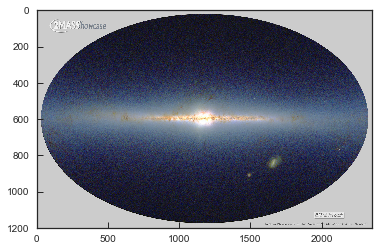

In [81]:
img = plt.imread('Galactic Plane.jpg')

plt.imshow(img,aspect='auto')

x=[1,2,3]
y=[1,4,9]
#plt.scatter(x,y)

# Galactic Longitude and Latitude

In [92]:
Glon_green=[]
Glat_green=[]
Glon_purple=[]
Glat_purple=[]
Glon_red=[]
Glat_red=[]
Glon_blue=[]
Glat_blue=[]
with open('Average Visits.csv') as csvfile:
        
    reader = csv.DictReader(csvfile,delimiter='\t')
    
    for row in reader:
        if float(row['Average Equivalent Width'])>0 and float(row['Average Equivalent Width'])<2.5:
            Glon_green.append(float(row['Glon']))
            Glat_green.append(float(row['Glat']))
        if float(row['Average Equivalent Width'])>2.5 and float(row['Average Equivalent Width'])<5:
            Glon_purple.append(float(row['Glon']))
            Glat_purple.append(float(row['Glat']))
        if float(row['Average Equivalent Width'])>5 and float(row['Average Equivalent Width'])<10:
            Glon_red.append(float(row['Glon']))
            Glat_red.append(float(row['Glat']))
        if float(row['Average Equivalent Width'])>10:
            Glon_blue.append(float(row['Glon']))
            Glat_blue.append(float(row['Glat']))

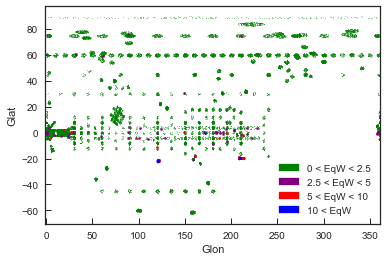

In [93]:
plt.xlabel('Glon')
plt.ylabel('Glat')
green_patch = patches.Patch(color='green', label='0 < EqW < 2.5')
purple_patch = patches.Patch(color='purple', label='2.5 < EqW < 5')
red_patch = patches.Patch(color='red', label='5 < EqW < 10')
blue_patch = patches.Patch(color='blue', label='10 < EqW')
plt.scatter(Glon_green,Glat_green,s=0.1,color='green')
plt.scatter(Glon_purple,Glat_purple,s=5,color='purple')
plt.scatter(Glon_red,Glat_red,s=5,color='red')
plt.scatter(Glon_blue,Glat_blue,s=5,color='blue')
plt.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],loc=4)
plt.xlim(-1,361)
#plt.ylim(-50,100)
#plt.show()
plt.savefig('GlonandGlat.png',dpi=300)

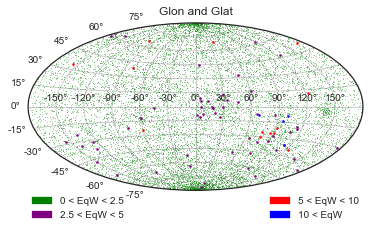

In [94]:
ax = plt.subplot(111, projection='aitoff')
ax.scatter(Glon_green, Glat_green,s=0.1,color='green')
ax.scatter(Glon_purple, Glat_purple,s=5,color='purple')
ax.scatter(Glon_red, Glat_red,s=5,color='red')
ax.scatter(Glon_blue, Glat_blue,s=5,color='blue')
#ax.set_rmax(90)
#ax.set_yticks([15, 30, 45, 60,75])# less radial ticks
#ax.set_yticklabels([15, 30, 45, 60,75],fontsize=6)
#ax.set_rlabel_position(90)  # get radial labels away from plotted line
ax.grid(True)
green_patch = patches.Patch(color='green', label='0 < EqW < 2.5')
purple_patch = patches.Patch(color='purple', label='2.5 < EqW < 5')
red_patch = patches.Patch(color='red', label='5 < EqW < 10')
blue_patch = patches.Patch(color='blue', label='10 < EqW')
#ax.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],loc=1)
#plt.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],
           #bbox_to_anchor=(1.01, 0.3), loc=2, borderaxespad=0.)
plt.legend(handles=[green_patch,purple_patch,red_patch,blue_patch],
           bbox_to_anchor=(0., -.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

ax.set_title("Glon and Glat", va='bottom')

plt.savefig('RAandDec.jpg',dpi=300)

# Sample Emission Spectra

In [2]:
def find_nearest(array,value):
    index = (np.abs(array-value)).argmin()
    #return array[index]
    return index

In [ ]:
def Br11_EqW_Plot(loc_id, two_massid):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    nvisits = spec_header[1]['NVISITS']
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[2]

    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./121.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    
    centerline = find_nearest(Lambda,calculated_point2)
        
    L1 = centerline - 90
    L2 = centerline - 45
    R1 = centerline + 45
    R2 = centerline + 90
    Lwindow = centerline - 125
    Rwindow = centerline + 125
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    
    #Plot averaged spectrum with EqW
    fig = plt.figure()
    plt.plot(Lambda,spec1)
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvspan(Lambda[L1],Lambda[L2],color='green',alpha=0.2)
    plt.axvspan(Lambda[R1],Lambda[R2],color='green',alpha=0.2)
    plt.axvline(x=Lambda[centerline],ls='dashed',color='r')
    #plt.axvline(x=16801,ls='dashed',color='r')
    plt.axvspan(lower,upper,ymin=0,ymax= 0.5,facecolor='blue',alpha=0.35)
    fig.suptitle(two_massid+' EqW', fontsize=20)
    plt.xlabel('Wavelength', fontsize=16)
    plt.ylabel('Flux', fontsize=16)
    plt.xlim(Lambda[Lwindow],Lambda[Rwindow])
    #plt.xlim(16500,18000)
    plt.ylim([0,Fc*2])

    #Multiplot
    
    
    #plt.annotate('Continuum window', xy=(16767,300), xytext=(16752, 100),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Equivalent Width', xy=(16782,300), xytext=(16760, 500),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Emission in vacuum', xy=(16801,300), xytext=(16803, 400),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('VHelio Corrected emission', xy=(16784,800), xytext=(16790,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Br11 emission spectra', xy=(16779,875), xytext=(16755,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    
    #plt.savefig('Br11 Test.pdf',dpi=300)
    #plt.savefig('Br11'+str(loc_id)+two_massid+'.pdf',dpi=300)

In [ ]:
Br11_EqW_Plot(4586,'2M03434449+3143092') #SNR = 364, Eqw = 7.2

In [ ]:
Br11_EqW_Plot(4612,'2M05351736-0525446') #SNR = 112, Eqw = 3

In [ ]:
Br11_EqW_Plot(4611,'2M05352443-0524398') #SNR = 143, Eqw = 2.5

In [ ]:
Br11_EqW_Plot(4280,'2M18385819-0827466') #SNR = 276, Eqw = 2

In [ ]:
Br11_EqW_Plot(4386,'2M17551655-2744386') #SNR = 192, Eqw = 1.76
Br11_EqW_Plot(4598,'2M05212545+1601440') #SNR = 318, Eqw = 1.75
Br11_EqW_Plot(4330,'2M17453382-2840395') #SNR = 179, Eqw = 1.75

In [ ]:
Br11_EqW_Plot(4330,'2M17464259-2840133') #SNR = 97, Eqw = 1.5, visits = 6
Br11_EqW_Plot(4390,'2M17361144-2503515') #SNR = 600, Eqw = 1.5, visits = 2
Br11_EqW_Plot(4348,'2M17400066-2323461') #SNR = 396, Eqw = 1.5, visits = 1
Br11_EqW_Plot(4156,'2M05590290+3101488') #SNR = 682, Eqw = 1.47, visits = 14

In [ ]:
Br11_EqW_Plot(4355,'2M18000472-2146125') #SNR = 397, Eqw = 1.25, visits = 2
Br11_EqW_Plot(4611,'2M05350537-0524105') #SNR = 71, Eqw = 1.25, visits = 4
Br11_EqW_Plot(4586,'2M03432222+3146136') #SNR = 146, Eqw = 1.25, visits = 16

In [ ]:
Br11_EqW_Plot(4240,'2M18451171-0321214') #SNR = 157, Eqw = 1.2, visits = 3
Br11_EqW_Plot(4611,'2M05353311-0517340') #SNR = 60, Eqw = 1.2, visits = 1
Br11_EqW_Plot(4610,'2M07370572+1654153') #SNR = 788, Eqw = 1.21, visits = 6
Br11_EqW_Plot(4248,'2M20032620+2242411') #SNR = 389, Eqw = 1.2, visits = 16

In [ ]:
Br11_EqW_Plot(4390,'2M17354511-2525444') #SNR = 341, Eqw = 1.1, visits = 2
Br11_EqW_Plot(4352,'2M17341132-2806083') #SNR = 174, Eqw = 1.1, visits = 3
Br11_EqW_Plot(4413,'AP00414291+4120063') #SNR = 33, Eqw = 1.1, visits = 4
Br11_EqW_Plot(4389,'2M17271102-2832089') #SNR = 286, Eqw = 1.1, visits = 2

In [ ]:
Br11_EqW_Plot(4358,'2M18290556-1107522') #SNR = 326, Eqw = 1, visits = 2
Br11_EqW_Plot(4363,'2M18004949-2736263') #SNR = 239, Eqw = 1, visits = 2
Br11_EqW_Plot(4386,'2M17563944-2817300') #SNR = 84, Eqw = 1, visits = 2
Br11_EqW_Plot(4353,'2M17383664-3057309') #SNR = 150, Eqw = 1, visits = 3

In [ ]:
Br11_EqW_Plot(4351,'2M17520814-3028091') #SNR = 157, Eqw = 0.75, visits = 2
Br11_EqW_Plot(4369,'2M18240911-1704264') #SNR = 643, Eqw = 0.75, visits = 2
Br11_EqW_Plot(4391,'2M17215839-2855194') #SNR = 59, Eqw = 0.75, visits = 2
Br11_EqW_Plot(4201,'2M15135789+0144046') #SNR = 37, Eqw = 0.75, visits = 6

In [ ]:
Br11_EqW_Plot(4355,'2M18071311-2217149') #SNR = 207, Eqw = 0.5, visits = 2
Br11_EqW_Plot(4105,'2M16421116+3618225') #SNR = 64, Eqw = 0.5, visits = 7
Br11_EqW_Plot(4344,'2M18141535-1221026') #SNR = 544, Eqw = 0.5, visits = 1
Br11_EqW_Plot(4483,'2M13514840+3419045') #SNR = 123, Eqw = 0.5, visits = 3

In [ ]:
Br11_EqW_Plot(4513,'2M12275808-0202492') #SNR = 223, Eqw = 0.2
Br11_EqW_Plot(4601,'2M06201809+4034139') #SNR = 222, Eqw = 0.1999
Br11_EqW_Plot(4216,'2M12193240+2554064') #SNR = 106, Eqw = 0.2
Br11_EqW_Plot(4155,'2M05304951+2532292') #SNR = 69, Eqw = 0.2

In [ ]:
Br11_EqW_Plot(4148,'2M12075469+1803102') #SNR = 56, Eqw = 0.1
Br11_EqW_Plot(4120,'2M00180696+6923544') #SNR = 91, Eqw = 0.099
Br11_EqW_Plot(4128,'2M13145800+1821203') #SNR = 200, Eqw = 0.099
Br11_EqW_Plot(4235,'2M12102631+0541140') #SNR = 490, Eqw = 0.1

In [ ]:
Br11_EqW_Plot(4489,'2M11525027+1828097') #SNR = 251, Eqw = 0

In [14]:
def Br12_EqW_Plot(loc_id, two_massid):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    
    nvisits = spec_header[1]['NVISITS']
    
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[2]

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./144.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    
    centerline = find_nearest(Lambda,calculated_point2)
        
    L1 = centerline - 90
    L2 = centerline - 45
    R1 = centerline + 45
    R2 = centerline + 90
    Lwindow = centerline - 125
    Rwindow = centerline + 125
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    #Plot averaged spectrum with EqW
    fig = plt.figure()
    plt.plot(Lambda,spec1)
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvspan(Lambda[L1],Lambda[L2],color='green',alpha=0.2)
    plt.axvspan(Lambda[R1],Lambda[R2],color='green',alpha=0.2)
    plt.axvline(x=Lambda[centerline],ls='dashed',color='r')
    #plt.axvline(x=16801,ls='dashed',color='r')
    plt.axvspan(lower,upper,ymin=0,ymax= 0.5,facecolor='blue',alpha=0.35)
    fig.suptitle(two_massid+'EqW', fontsize=20)
    plt.xlabel('Wavelength', fontsize=16)
    plt.ylabel('Flux', fontsize=16)
    plt.xlim(Lambda[Lwindow],Lambda[Rwindow])
    plt.ylim([0,Fc*2])

    #plt.annotate('Continuum window', xy=(16767,300), xytext=(16752, 100),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Equivalent Width', xy=(16782,300), xytext=(16760, 500),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Emission in vacuum', xy=(16801,300), xytext=(16803, 400),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('VHelio Corrected emission', xy=(16784,800), xytext=(16790,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Br11 emission spectra', xy=(16779,875), xytext=(16755,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    
    #plt.savefig('Br12 Test.pdf',dpi=300)
    #plt.savefig('Br12'+str(loc_id)+two_massid+'.pdf',dpi=300)

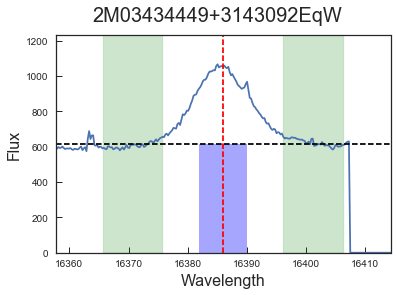

In [9]:
Br12_EqW_Plot(4586,'2M03434449+3143092')

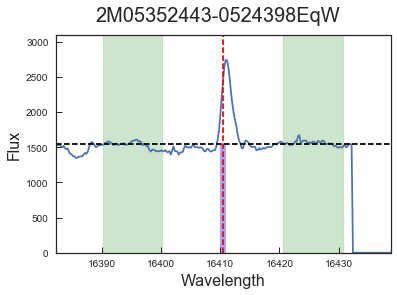

In [15]:
Br12_EqW_Plot(4611,'2M05352443-0524398') #SNR = 143, Eqw = 2.5

In [ ]:
def Br11_calc():
    spec_header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)


    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./121.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    print(calculated_point2)

In [ ]:
def Br10_calc():
    spec_header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)


    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./100.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    print(calculated_point2)

In [ ]:
Br11_calc()

In [ ]:
Br10_calc()

In [19]:
def Br13_EqW_Plot(loc_id, two_massid):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    
    nvisits = spec_header[1]['NVISITS']
    
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[2]

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./169.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    
    centerline = find_nearest(Lambda,calculated_point2)
        
    L1 = centerline - 90
    L2 = centerline - 45
    R1 = centerline + 45
    R2 = centerline + 90
    Lwindow = centerline - 125
    Rwindow = centerline + 125
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    #Plot averaged spectrum with EqW
    fig = plt.figure()
    plt.plot(Lambda,spec1)
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvspan(Lambda[L1],Lambda[L2],color='green',alpha=0.2)
    plt.axvspan(Lambda[R1],Lambda[R2],color='green',alpha=0.2)
    plt.axvline(x=Lambda[centerline],ls='dashed',color='r')
    #plt.axvline(x=16801,ls='dashed',color='r')
    plt.axvspan(lower,upper,ymin=0,ymax= 0.5,facecolor='blue',alpha=0.35)
    fig.suptitle(two_massid+'EqW', fontsize=20)
    plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=16)
    plt.ylabel('Flux', fontsize=16)
    plt.xlim(Lambda[Lwindow],Lambda[Rwindow])
    plt.ylim([0,Fc*2])

    #plt.annotate('Continuum window', xy=(16767,300), xytext=(16752, 100),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Equivalent Width', xy=(16782,300), xytext=(16760, 500),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Emission in vacuum', xy=(16801,300), xytext=(16803, 400),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('VHelio Corrected emission', xy=(16784,800), xytext=(16790,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Br11 emission spectra', xy=(16779,875), xytext=(16755,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    
    #plt.savefig('Br12 Test.pdf',dpi=300)
    #plt.savefig('Br12'+str(loc_id)+two_massid+'.pdf',dpi=300)

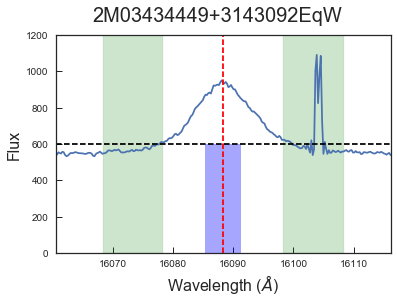

In [20]:
Br13_EqW_Plot(4586,'2M03434449+3143092') #SNR = 364, Eqw = 7.2

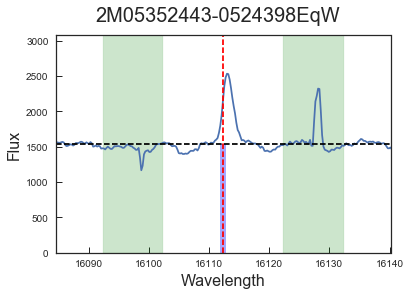

In [6]:
Br13_EqW_Plot(4611,'2M05352443-0524398') #SNR = 143, Eqw = 2.5

In [10]:
def Brackett_EqW_Plot(loc_id, two_massid,number):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    
    nvisits = spec_header[1]['NVISITS']
    n=number
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[2]

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./(float(n**2))))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    
    centerline = find_nearest(Lambda,calculated_point2)
        
    L1 = centerline - 90
    L2 = centerline - 45
    R1 = centerline + 45
    R2 = centerline + 90
    Lwindow = centerline - 125
    Rwindow = centerline + 125
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    #Plot averaged spectrum with EqW
    fig = plt.figure()
    plt.plot(Lambda,spec1)
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvspan(Lambda[L1],Lambda[L2],color='green',alpha=0.2)
    plt.axvspan(Lambda[R1],Lambda[R2],color='green',alpha=0.2)
    plt.axvline(x=Lambda[centerline],ls='dashed',color='r')
    #plt.axvline(x=16801,ls='dashed',color='r')
    plt.axvspan(lower,upper,ymin=0,ymax= 0.5,facecolor='blue',alpha=0.35)
    fig.suptitle(two_massid+' EqW', fontsize=18)
    plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=16)
    plt.ylabel('Flux', fontsize=16)
    plt.xlim(Lambda[Lwindow],Lambda[Rwindow])
    plt.ylim([0,Fc*2])

    #plt.annotate('Continuum window', xy=(16767,300), xytext=(16752, 100),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Equivalent Width', xy=(16782,300), xytext=(16760, 500),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Emission in vacuum', xy=(16801,300), xytext=(16803, 400),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('VHelio Corrected emission', xy=(16784,800), xytext=(16790,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    #plt.annotate('Br11 emission spectra', xy=(16779,875), xytext=(16755,1000),
    #            arrowprops=dict(arrowstyle="->",
    #                            connectionstyle="angle3",facecolor='black'),)
    
    #plt.savefig('Example Emission.pdf',dpi=1000,bbox_inches='tight')
    #plt.savefig('Br12'+str(loc_id)+two_massid+'.pdf',dpi=300)

In [ ]:
Brackett_EqW_Plot(4611,'2M05352443-0524398',11) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4611,'2M05352443-0524398',12) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4611,'2M05352443-0524398',13) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4611,'2M05352443-0524398',14) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4611,'2M05352443-0524398',15) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4611,'2M05352443-0524398',16) #SNR = 143, Eqw = 2.5

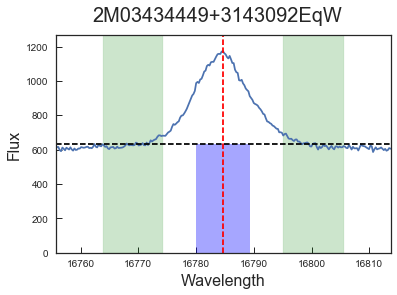

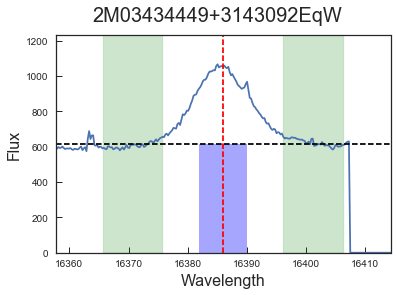

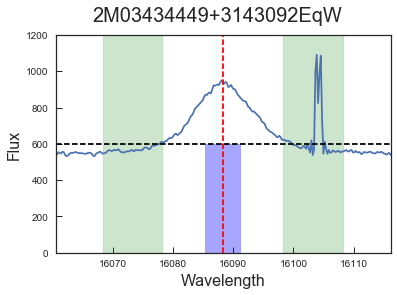

In [14]:
Brackett_EqW_Plot(4586,'2M03434449+3143092',11) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4586,'2M03434449+3143092',12) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4586,'2M03434449+3143092',13) #SNR = 143, Eqw = 2.5

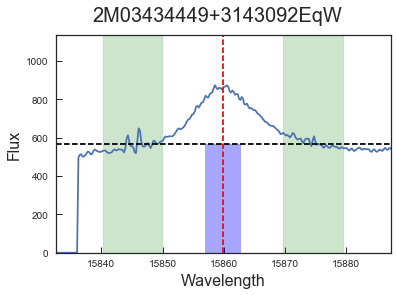

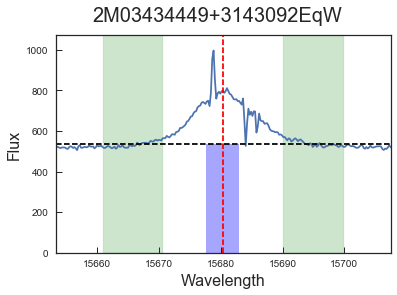

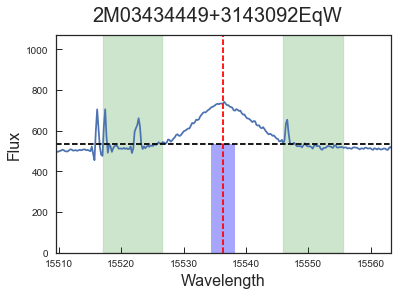

In [15]:
Brackett_EqW_Plot(4586,'2M03434449+3143092',14) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4586,'2M03434449+3143092',15) #SNR = 143, Eqw = 2.5
Brackett_EqW_Plot(4586,'2M03434449+3143092',16) #SNR = 143, Eqw = 2.5

# Cumulative Plots

In [ ]:
data=[]
with open('All Visits.csv') as csvfile:
        
    reader = csv.DictReader(csvfile,delimiter='\t')
    
    for row in reader:
        data.append(float(row['SNR']))
data.sort()

In [ ]:
plt.hist(data,bins=10000,normed=True,cumulative=True,histtype='step',log=False)
plt.axhline(0.2,ls='dashed',color='r')
plt.axhline(0.4,ls='dashed',color='r')
plt.axhline(0.6,ls='dashed',color='r')
plt.axhline(0.8,ls='dashed',color='r')
plt.axvline(0,ls='dashed',color='blue')
plt.axvline(100,ls='dashed',color='blue')
plt.axvline(200,ls='dashed',color='blue')
plt.ylabel('Percent of Sample')
plt.xlabel('SNR')
plt.savefig('SNR Cumulative.pdf',dpi=300)
#plt.show()